Learn to predict the number of real solutions of the tritangent circles to three conics.

In [2]:
#TODO inspect predictions
#TODO check distribution of real counts in training data
#TODO ???

#TODO man bekommt nicht immer zwei weitere Lösungen!!
#TODO R18 -> R2 svd plot ral count

In [3]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [4]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)

batch_1 = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
# batch_2 = df[[col for col in df.columns if col[0].islower()]].rename(str.lower, axis='columns')
# batch_2.insert(0, "counts", np.array(batch_1['counts']) - 2)
# batch_2[batch_2['counts'] < 0] = 0
data = batch_1 # .append(batch_2).reset_index().drop('index', axis=1)

In [5]:
data.sample()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,counts
61388,0.612288,-0.437362,0.16955,0.775142,0.682335,0.655965,0.094439,0.075138,0.454357,0.369071,0.02769,0.367478,0.414723,0.811409,0.383862,0.314399,0.363383,-0.016256,16


In [6]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.95*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=(18,)),
    keras.layers.Dense(units=64, activation='relu'),    
    keras.layers.Dense(units=96, activation='relu'),
    keras.layers.Dense(units=84, activation='softmax')
])

model.summary()

2022-07-28 13:58:06.563385: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 13:58:06.568807: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                608       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 84)                8148      
Total params: 17,108
Trainable params: 17,108
Non-trainable params: 0
_________________________________________________________________


In [20]:
sce = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='RMSprop', 
              loss=sce,
              metrics=['accuracy', sce])

In [22]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=250,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 95000 samples, validate on 5000 samples
Epoch 1/250
95000/95000 - 16s - loss: 2.1322 - accuracy: 0.3007 - sparse_categorical_crossentropy: 2.1321 - val_loss: 2.1698 - val_accuracy: 0.2680 - val_sparse_categorical_crossentropy: 2.1803
Epoch 2/250
95000/95000 - 14s - loss: 2.1370 - accuracy: 0.2985 - sparse_categorical_crossentropy: 2.1370 - val_loss: 2.1436 - val_accuracy: 0.2820 - val_sparse_categorical_crossentropy: 2.1571
Epoch 3/250
95000/95000 - 21s - loss: 2.1417 - accuracy: 0.2984 - sparse_categorical_crossentropy: 2.1418 - val_loss: 2.1961 - val_accuracy: 0.2746 - val_sparse_categorical_crossentropy: 2.2098
Epoch 4/250
95000/95000 - 16s - loss: 2.1501 - accuracy: 0.2935 - sparse_categorical_crossentropy: 2.1501 - val_loss: 2.1761 - val_accuracy: 0.2800 - val_sparse_categorical_crossentropy: 2.1897
Epoch 5/250
95000/95000 - 13s - loss: 2.1540 - accuracy: 0.2940 - sparse_categorical_crossentropy: 2.1540 - val_loss: 2.2169 - val_accuracy: 0.2666 - val_sparse_categorical_cr

[]

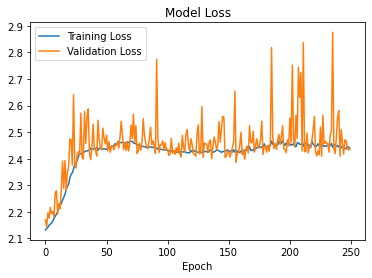

In [23]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

In [24]:
# Inspect Predictions 
fig = plt.figure()
prediction = 2*np.argmax(model.predict(data.drop('counts', axis=1)), axis=1)
# plt.plot(prediction, 'o')
# plt.show()

<Figure size 432x288 with 0 Axes>

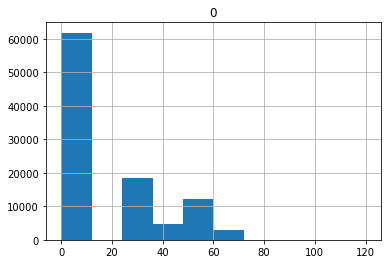

In [25]:
# Distrbution of predictions
df = pd.DataFrame(prediction)
fig = df.hist()

<AxesSubplot:>

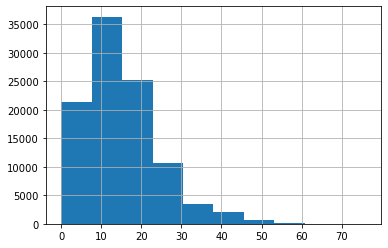

In [26]:
# Distrbution of data
data.counts.hist()